In [667]:
RANDOM_SEED=1

# import base packages into the namespace for this program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

import warnings
warnings.simplefilter(action='ignore')

# read data for the Boston Housing Study
# creating data frame restdata
train_filedata = pd.read_csv('train.csv')
train_filedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [668]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(100,100))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')

In [669]:
train_filedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [670]:
test_filedata = pd.read_csv('test.csv')
test_filedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [671]:
test_filedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


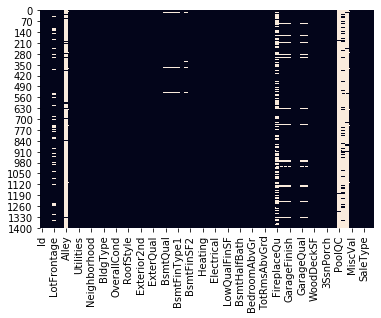

In [672]:
sns.heatmap(train_filedata.isnull(),cbar=False)

In [673]:
train_missing_data=train_filedata.isnull().sum()*100/len(train_filedata)
pd.set_option('display.max_rows',100)
train_missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [674]:
# x data and y data
delcolumns=['MSSubClass','MSZoning','Utilities','HouseStyle','Alley','OverallCond','Neighborhood','BsmtFinSF2','LowQualFinSF',
            'RoofStyle','RoofMatl','Exterior1st','KitchenAbvGr','GarageType','GarageFinish',
                                        'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                                        'BsmtQual','BsmtCond','BsmtFinType1',
                                        'BsmtFinType2','Electrical', 'Heating','HeatingQC',                                       
                                        'BsmtHalfBath','FireplaceQu',
                                        'GarageQual','GarageCond','PavedDrive',
                                        'MiscFeature','LotFrontage','GarageYrBlt','MasVnrArea','PoolQC',
            'EnclosedPorch','MiscVal','YrSold','KitchenQual','Fence', 'Functional',
            'MoSold','3SsnPorch','PoolArea','Street','LandContour','LotConfig','Condition2','BsmtExposure','LandSlope', 'BldgType'
                                       ]
train_data=train_filedata.drop(columns=delcolumns)

In [675]:
test_data=test_filedata.drop(columns=delcolumns)

In [676]:
# Convert Condition to numeric
convert_condition={'Artery':0,'Feedr':1,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9}
temp_df=train_data['Condition1'].map(convert_condition)
train_data['Condition1']=temp_df

temp_df=test_data['Condition1'].map(convert_condition)
test_data['Condition1']=temp_df

#temp_df=train_data['Condition2'].map(convert_condition)
#train_data['Condition2']=temp_df

#temp_df=test_data['Condition2'].map(convert_condition)
#test_data['Condition2']=temp_df

In [677]:
# Convert BsmtExposure to numeric
#convert_bsmtexp={'NA':0,'Gd':1,'Av':2,'Mn':3,'No':4}
#temp_df=train_data['BsmtExposure'].map(convert_bsmtexp)
#train_data['BsmtExposure']=temp_df

#temp_df=test_data['BsmtExposure'].map(convert_bsmtexp)
#test_data['BsmtExposure']=temp_df

In [678]:
# Convert BldgType to numeric
#convert_bldgtype={'1Fam':0,'2FmCom':1,'Duplx':2,'TwnhsE':3,'TwnhsI':4}
#temp_df=train_data['BldgType'].map(convert_bldgtype)
#train_data['BldgType']=temp_df

#temp_df=test_data['BldgType'].map(convert_bldgtype)
#test_data['BldgType']=temp_df

In [679]:
# Convert Street to numeric
#convert_street={'Grvl':0,'Pave':1}
#temp_df=train_data['Street'].map(convert_street)
#train_data['Street']=temp_df

#temp_df=test_data['Street'].map(convert_street)
#test_data['Street']=temp_df

In [680]:
# Convert LandSlope to numeric
#convert_landslope={'Gtl':0,'Mod':1,'Sev':2}
#temp_df=train_data['LandSlope'].map(convert_landslope)
#train_data['LandSlope']=temp_df

#temp_df=test_data['LandSlope'].map(convert_landslope)
#test_data['LandSlope']=temp_df

In [681]:
# Convert Central Air to numeric
convert_to_binary={'N':0,'Y':1}
temp_df=train_data['CentralAir'].map(convert_to_binary)
train_data['CentralAir']=temp_df

temp_df=test_data['CentralAir'].map(convert_to_binary)
test_data['CentralAir']=temp_df

In [682]:
# Convert SaleCondition to numeric
convert_salecondition={'Normal':0,'Abnorml':1,'AdjLand':2,'Alloca':3,'Family':4,'Partial':5}
temp_df=train_data['SaleCondition'].map(convert_salecondition)
train_data['SaleCondition']=temp_df

temp_df=test_data['SaleCondition'].map(convert_salecondition)
test_data['SaleCondition']=temp_df

In [683]:
# Convert SaleType to numeric
convert_saletype={'WD':0,'CWD':1,'VWD':2,'New':3,'COD':4,'Con':5,'ConLw':6,'ConLI':7,'ConLD':8,'Oth':9}
temp_df=train_data['SaleType'].map(convert_saletype)
train_data['SaleType']=temp_df

temp_df=test_data['SaleType'].map(convert_saletype)
test_data['SaleType']=temp_df

In [684]:
# Convert Fence to numeric
#convert_fence={'GdPrv':0,'MnPrv':1,'GdWo':2,'MnWw':3,'NA':4}
#temp_df=train_data['Fence'].map(convert_fence)
#train_data['Fence']=temp_df

#temp_df=test_data['Fence'].map(convert_fence)
#test_data['Fence']=temp_df

In [685]:
# Convert LandContour to numeric
#convert_landcontour={'Lvl':0,'Bnk':1,'HLS':2,'Low':3}
#temp_df=train_data['LandContour'].map(convert_landcontour)
#train_data['LandContour']=temp_df

#temp_df=test_data['LandContour'].map(convert_landcontour)
#test_data['LandContour']=temp_df

In [686]:
# Convert LotConfig to numeric
#convert_lotconfig={'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4}
#temp_df=train_data['LotConfig'].map(convert_lotconfig)
#train_data['LotConfig']=temp_df

#temp_df=test_data['LotConfig'].map(convert_lotconfig)
#test_data['LotConfig']=temp_df

In [687]:
# Convert LotShape to numeric
convert_lotshape={'Reg':0,'IR1':1,'IR2':2,'IR3':3}
temp_df=train_data['LotShape'].map(convert_lotshape)
train_data['LotShape']=temp_df

temp_df=test_data['LotShape'].map(convert_lotshape)
test_data['LotShape']=temp_df

In [688]:
train_data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [689]:
corr_data=train_data.corr()
corr_data

,Id,LotArea,LotShape,Condition1,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
Id,1.000000,-0.033226,-0.024071,-0.018247,-0.028365,-0.012713,-0.021998,-0.005024,-0.007940,-0.015415,...,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.001330,-0.028774,-0.021060,-0.021917
LotArea,-0.033226,1.000000,0.315484,0.032573,0.105806,0.014228,0.013788,0.214103,-0.002618,0.260833,...,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.043160,-0.004436,0.013773,0.263843
LotShape,-0.024071,0.315484,1.000000,0.096835,0.198994,0.229365,0.175488,0.157718,0.014179,0.200469,...,0.137148,0.202019,0.194984,0.173472,0.161717,0.093135,0.065182,0.008355,0.027139,0.267759
Condition1,-0.018247,0.032573,0.096835,1.000000,0.109307,0.198147,0.155936,0.060744,0.021346,0.085029,...,0.041608,0.022800,0.110557,0.089003,0.059400,0.081863,0.018132,0.025398,0.022991,0.113916
OverallQual,-0.028365,0.105806,0.198994,0.109307,1.000000,0.572323,0.550684,0.239666,0.308159,0.537808,...,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.064886,0.134304,0.269625,0.790982
YearBuilt,-0.012713,0.014228,0.229365,0.198147,0.572323,1.000000,0.592855,0.249503,0.149040,0.391452,...,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.050364,0.160709,0.290899,0.522897
YearRemodAdd,-0.021998,0.013788,0.175488,0.155936,0.550684,0.592855,1.000000,0.128451,0.181133,0.291066,...,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.038740,0.109087,0.261054,0.507101
BsmtFinSF1,-0.005024,0.214103,0.157718,0.060744,0.239666,0.249503,0.128451,1.000000,-0.495251,0.522396,...,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.062021,0.013522,0.041445,0.386420
BsmtUnfSF,-0.007940,-0.002618,0.014179,0.021346,0.308159,0.149040,0.181133,-0.495251,1.000000,0.415360,...,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.012579,0.146274,0.225889,0.214479
TotalBsmtSF,-0.015415,0.260833,0.200469,0.085029,0.537808,0.391452,0.291066,0.522396,0.415360,1.000000,...,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.084489,0.148985,0.240659,0.613581


<Figure size 432x288 with 0 Axes>

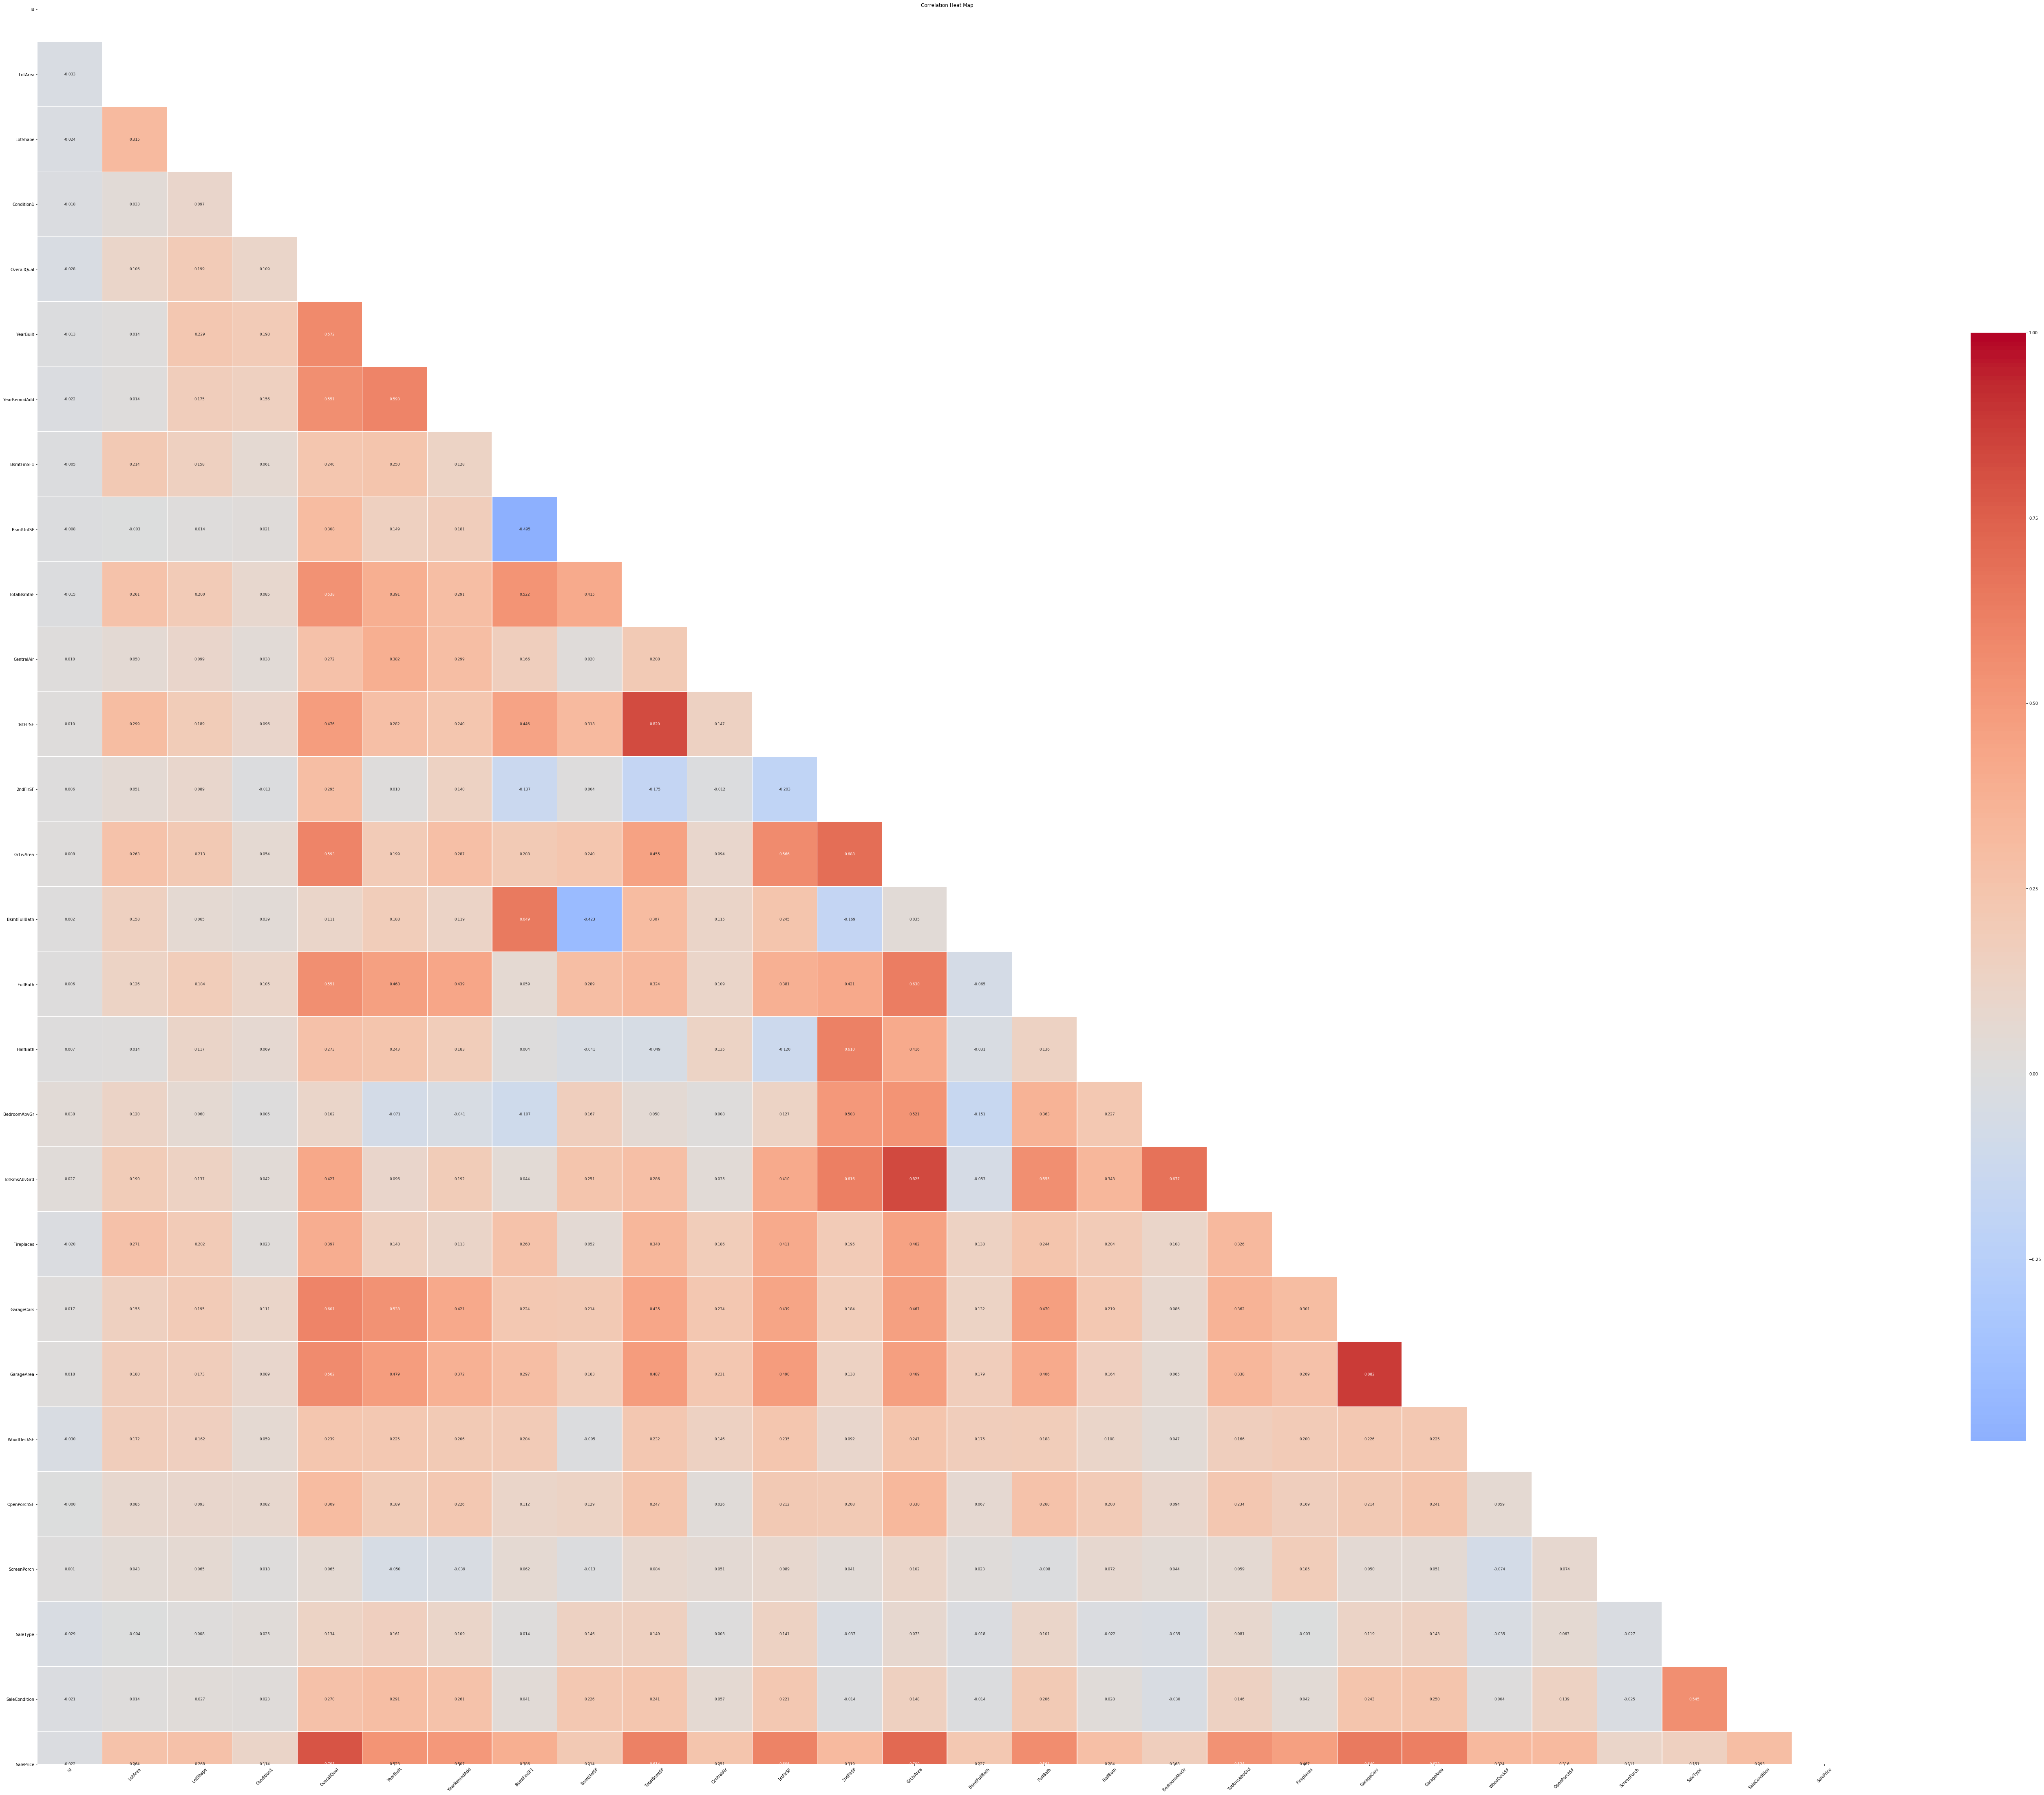

In [690]:
#corr_chart(df_corr = train_data)

corr_chart(df_corr = train_data)
#pd.set_option('display.max_columns',100)
#t_data
#corr_data['SalePrice':]

In [691]:
#m_data=train_data.isnull().sum()*100/len(train_data)
#pd.set_option('display.max_rows',100)
#m_data

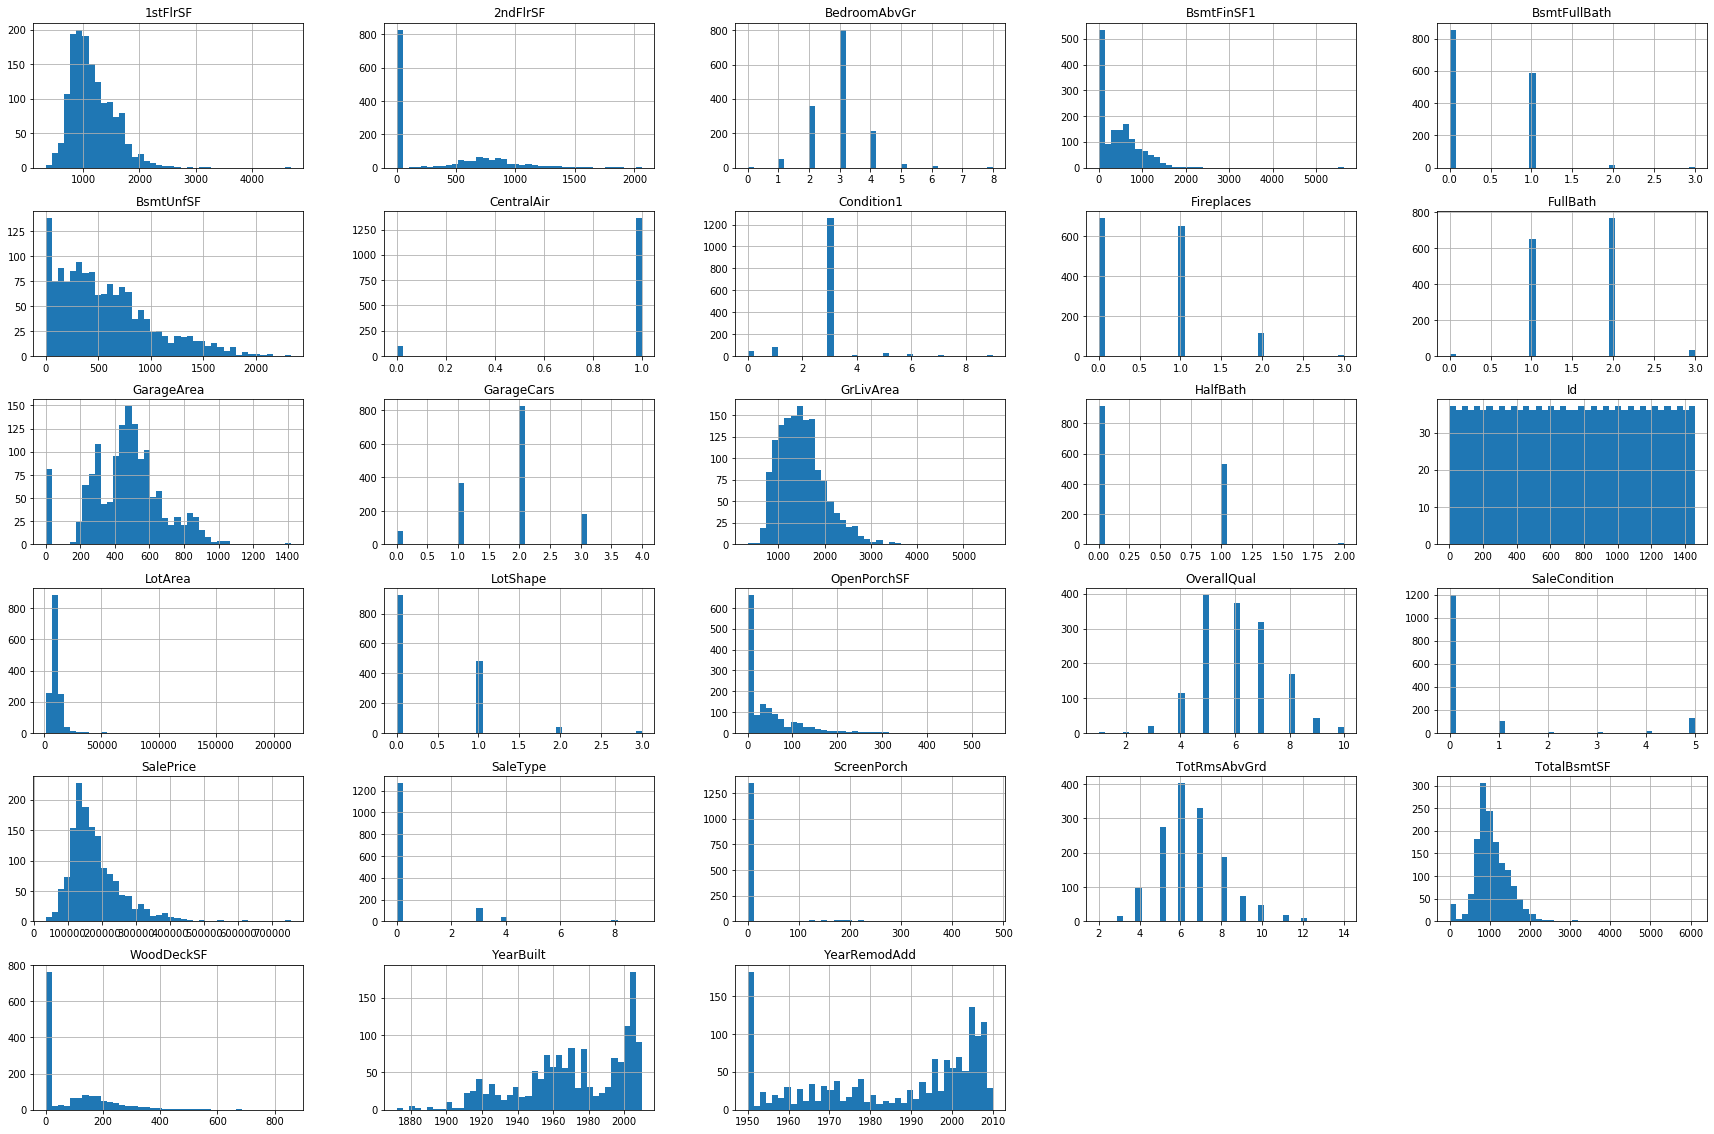

In [692]:
train_data.hist(bins=40,figsize=(30,20));
plt.show()

In [693]:
#t_data=test_data.isnull().sum()*100/len(test_data)
#pd.set_option('display.max_rows',100)
#t_data

In [694]:
train_x=train_data.copy()
train_x.drop(columns=['SalePrice'], inplace=True)
train_y=train_data[['SalePrice']]


In [695]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# split data using test_train_split
lin_x_train,lin_x_test,lin_y_train,lin_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

Number of features used: 27
Training set score: 0.7887849834489229
Testing set score: 0.8129640324858087


,Id,SalePrice
0,1461,112047.895158
1,1462,159493.743003
2,1463,175479.569862
3,1464,201241.454930
4,1465,215358.636992
5,1466,186171.541835
6,1467,196679.615989
7,1468,171178.579907
8,1469,204539.518395
9,1470,111413.554318


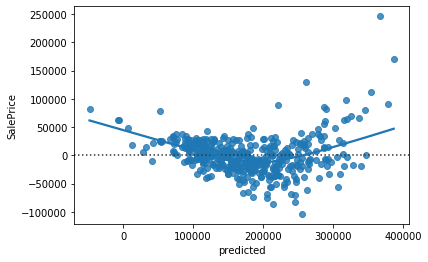

In [696]:

lin_test=test_data.copy()
lin_test_res=test_data[['Id']]


#Linear Regression
lin_reg=LinearRegression(fit_intercept=True).fit(lin_x_train,lin_y_train)

lin_score=lin_reg.score(lin_x_test,lin_y_test)

print('Number of features used:',np.sum(lin_reg.coef_ !=0))
print('Training set score:', lin_reg.score(lin_x_train,lin_y_train))
print('Testing set score:',lin_reg.score(lin_x_test,lin_y_test))

lin_y_test['predicted']=lin_reg.predict(lin_x_test)

sns.residplot(lin_y_test['predicted'],lin_y_test['SalePrice'],lowess=True)
lin_np=np.sqrt(mean_squared_error(lin_y_test['SalePrice'],lin_y_test['predicted']))

lin_test_res['SalePrice']=lin_reg.predict(lin_test)

pd.set_option('display.max_rows',1500)
lin_test_res


Number of features used: 27
Training set score: 0.7887844165506989
Test set score: 0.8131303214712011


,Id,SalePrice
0,1461,112212.957331
1,1462,159569.461417
2,1463,175569.431357
3,1464,201295.356283
4,1465,215317.020411
5,1466,186173.808667
6,1467,196654.570172
7,1468,171174.687848
8,1469,204543.342796
9,1470,111397.496268


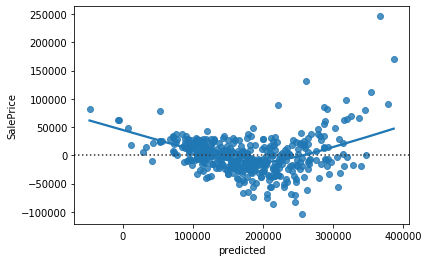

In [697]:
#ridge regression
ridge_test=test_data.copy()
ridge_test_res=test_data[['Id']]

from sklearn.linear_model import Ridge
ridge_train_x, ridge_test_x,ridge_train_y,ridge_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
ridge_model = Ridge(alpha=1, solver="cholesky",fit_intercept=True).fit(ridge_train_x,ridge_train_y)
print("Number of features used: {}".format(np.sum(ridge_model.coef_ !=0)))
print("Training set score:" ,ridge_model.score(ridge_train_x,ridge_train_y))
ridge_score=ridge_model.score(ridge_test_x,ridge_test_y)
print("Test set score:" ,ridge_score)
ridge_test_y['predicted']=ridge_model.predict(ridge_test_x)
sns.residplot(ridge_test_y['predicted'],ridge_test_y['SalePrice'],lowess=True)
ridge_np=np.sqrt(mean_squared_error(ridge_test_y['SalePrice'],ridge_test_y['predicted']))

ridge_test_res['SalePrice']=ridge_model.predict(ridge_test)

pd.set_option('display.max_rows',1500)
ridge_test_res


Number of features used: 27
Training set score: 0.7887849833262454
Test set score: 0.8129659886345015


,Id,SalePrice
0,1461,112049.602150
1,1462,159495.220821
2,1463,175480.675533
3,1464,201242.139554
4,1465,215358.862945
5,1466,186171.340330
6,1467,196679.774175
7,1468,171178.429000
8,1469,204539.895511
9,1470,111413.220347


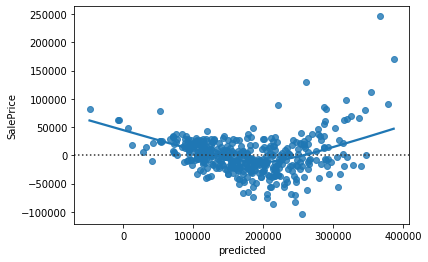

In [698]:
#lasso regression
lasso_test=test_data.copy()
lasso_test_res=test_data[['Id']]

from sklearn.linear_model import Lasso
lasso_train_x, lasso_test_x,lasso_train_y,lasso_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
lasso_model = Lasso(alpha=.1, max_iter = 10000,fit_intercept=True,tol=0.01).fit(lasso_train_x,lasso_train_y)
print("Number of features used: {}".format(np.sum(lasso_model.coef_ !=0)))
print("Training set score:" ,lasso_model.score(lasso_train_x,lasso_train_y))
lasso_score=lasso_model.score(lasso_test_x,lasso_test_y)
print("Test set score:" ,lasso_score)
lasso_test_y['predicted']=lasso_model.predict(lasso_test_x)
sns.residplot(lasso_test_y['predicted'],lasso_test_y['SalePrice'],lowess=True)

lasso_np=np.sqrt(mean_squared_error(lasso_test_y['SalePrice'],lasso_test_y['predicted']))

lasso_test_res['SalePrice']=lasso_model.predict(lasso_test)


pd.set_option('display.max_rows',1500)
lasso_test_res

Number of features used: 27
Training set score: 0.7880790115300065
Test set score: 0.8174549139372845


,Id,SalePrice
0,1461,118228.795452
1,1462,162120.626848
2,1463,179184.644311
3,1464,203213.222087
4,1465,213480.434705
5,1466,186337.315516
6,1467,195870.016926
7,1468,170972.633481
8,1469,204195.254813
9,1470,111495.119177


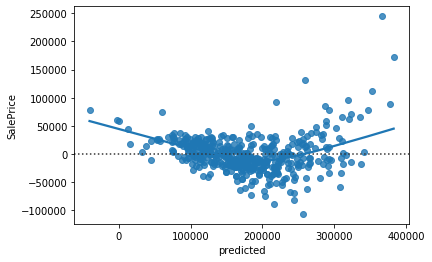

In [699]:
#elastic net

es_test=test_data.copy()
es_test_res=test_data[['Id']]

from sklearn.linear_model import ElasticNet
es_train_x, es_test_x,es_train_y,es_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
es_model = ElasticNet(random_state=1, alpha=0.1,fit_intercept=True,tol=0.01).fit(es_train_x,es_train_y)
print("Number of features used: {}".format(np.sum(es_model.coef_ !=0)))
print("Training set score:" ,es_model.score(es_train_x,es_train_y))
es_score=es_model.score(es_test_x,es_test_y)
print("Test set score:" ,es_score)
es_test_y['predicted']=es_model.predict(es_test_x)
sns.residplot(es_test_y['predicted'],es_test_y['SalePrice'],lowess=True)
es_np=np.sqrt(mean_squared_error(es_test_y['SalePrice'],es_test_y['predicted']))

es_test_res['SalePrice']=es_model.predict(es_test)

pd.set_option('display.max_rows',1500)
es_test_res

In [700]:

des_tree=test_data.copy()
des_tree_res=test_data[['Id']]

# split data using test_train_split
des_x_train,des_x_test,des_y_train,des_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

#Decision tree
from sklearn.tree import DecisionTreeRegressor  # machine learning tree

tree_model_maker = DecisionTreeRegressor(random_state = 9999, max_depth = 5)


# fit regression tree using model 1 training/test split
tree_model_fit = tree_model_maker.fit(des_x_train, des_y_train)

#print("Number of features used: {}".format(np.sum(tree_model_maker.coef_ !=0)))

tree_score=tree_model_maker.score(des_x_test,des_y_test)

des_y_train['predicted'] = tree_model_fit.predict(des_x_train)
full_tree_train_result = round(np.power(des_y_train['SalePrice'].corr(des_y_train['predicted']),2),3)
print('\nFull Tree Proportion of Training Set Variance Accounted for: ',full_tree_train_result)

# compute the proportion of response variance for test data

des_y_test['predicted'] = tree_model_fit.predict(des_x_test)
full_tree_train_result = round(np.power(des_y_test['SalePrice'].corr(des_y_test['predicted']),2),3)
print('\nFull Tree Proportion of Training Set Variance Accounted for: ',full_tree_train_result)

tree_np=np.sqrt(mean_squared_error(des_y_test['SalePrice'],des_y_test['predicted']))


des_tree_res['SalePrice']=tree_model_maker.predict(des_tree)

pd.set_option('display.max_rows',1500)
des_tree_res



Full Tree Proportion of Training Set Variance Accounted for:  0.873

Full Tree Proportion of Training Set Variance Accounted for:  0.713


,Id,SalePrice
0,1461,123388.211268
1,1462,132639.285714
2,1463,152991.571429
3,1464,183593.347107
4,1465,208941.769231
5,1466,183593.347107
6,1467,152895.802632
7,1468,183593.347107
8,1469,188180.400000
9,1470,123388.211268


Training set score: 0.87
Test set score: 0.80


,Id,SalePrice
0,1461,125349.834062
1,1462,142805.970416
2,1463,167358.263520
3,1464,178192.341672
4,1465,230942.085693
5,1466,177550.388160
6,1467,150530.972499
7,1468,171218.672569
8,1469,184536.958913
9,1470,125383.995617


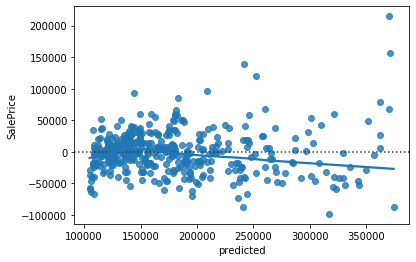

In [701]:
for_test=test_data.copy()
for_test_res=test_data[['Id']]

# split data using test_train_split
for_x_train,for_x_test,for_y_train,for_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)


# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RForest1 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)

RForest1.fit(for_x_train,for_y_train)

forest_score=RForest1.score(for_x_test,for_y_test)
#print("Number of features used: {}".format(np.sum(RForest1.coef_ !=0)))
print("Training set score: {:.2f}".format(RForest1.score(for_x_train,for_y_train)))
print("Test set score: {:.2f}".format(RForest1.score(for_x_test,for_y_test)))

for_y_test['predicted']=RForest1.predict(for_x_test)

sns.residplot(for_y_test['predicted'],for_y_test['SalePrice'],lowess=True)

forest_np=np.sqrt(mean_squared_error(for_y_test['SalePrice'],for_y_test['predicted']))

for_test_res['SalePrice']=RForest1.predict(for_test)

pd.set_option('display.max_rows',1500)
for_test_res

#for_test_res.to_csv("random_test_data.csv",index=False)

In [702]:
grad_test=test_data.copy()
grad_test_res=test_data[['Id']]

# split data using test_train_split
grad_x_train,grad_x_test,grad_y_train,grad_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(grad_x_train,grad_y_train)

errors = [mean_squared_error(grad_y_test, y_pred)
          for y_pred in gbrt.staged_predict(grad_x_test)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(grad_x_train,grad_y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=119,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training set score: 0.95
Test set score: 0.88


,Id,SalePrice
0,1461,116846.120232
1,1462,164467.703499
2,1463,187999.708677
3,1464,189345.933428
4,1465,209058.294253
5,1466,174618.519241
6,1467,173735.207563
7,1468,160815.261450
8,1469,196102.803445
9,1470,130099.876247


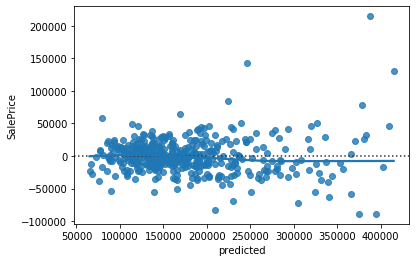

In [703]:
grad_score=gbrt_best.score(grad_x_test,grad_y_test)
print("Training set score: {:.2f}".format(gbrt_best.score(grad_x_train,grad_y_train)))
print("Test set score: {:.2f}".format(gbrt_best.score(grad_x_test,grad_y_test)))
#print("Number of features used: {}".format(np.sum(gbrt_best.coef_ !=0)))


grad_y_test['predicted']= gbrt_best.predict(grad_x_test)
# Plot the residuals after fitting a linear model
sns.residplot(grad_y_test['predicted'], grad_y_test['SalePrice'], lowess=True)


grad_np=np.sqrt(mean_squared_error(grad_y_test['SalePrice'],grad_y_test['predicted']))

grad_test_res['SalePrice']=gbrt_best.predict(grad_test)

pd.set_option('display.max_rows',1500)
grad_test_res

#grad_test_res.to_csv("gradient_test_data.csv",index=False)

In [704]:
data={'Model':['Linear','Ridge','Lasso','ElasticNet','Decision Tree','RandomForest','GradientBoost'],
      'RMSE':[lin_np,ridge_np,lasso_np,es_np,tree_np,forest_np,grad_np],
      'Score':[round(lin_score*100,30),round(ridge_score*100,30),
               round(lasso_score*100,30),round(es_score*100,30),
               round(tree_score*100,30),
               round(forest_score*100,30),round(grad_score*100,30)
              ]
     }
result=pd.DataFrame(data,columns=['Model','RMSE','Score'])
result.sort_values(by='RMSE')      


,Model,RMSE,Score
6,GradientBoost,27040.561603,87.518960
3,ElasticNet,32702.080706,81.745491
1,Ridge,33087.178311,81.313032
2,Lasso,33101.723515,81.296599
0,Linear,33101.896616,81.296403
5,RandomForest,34044.094060,80.216509
4,Decision Tree,41136.679707,71.114636
